In [ ]:
import boto3
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
AWS_ACCESS_KEY = ''
AWS_SECRET_KEY = ''

In [ ]:
client = boto3.client('rekognition',
                      aws_access_key_id=AWS_ACCESS_KEY,
                      aws_secret_access_key=AWS_SECRET_KEY,
                      region_name='us-west-1')

### Comparação de Faces

In [ ]:
return_compare_faces = client.compare_faces(    
    SourceImage={
        'S3Object': {
            'Bucket': 'grupomachinelearning',
            'Name': 'imagens/regis.jpg',
        }
    },
    TargetImage={
        'S3Object': {
            'Bucket': 'grupomachinelearning',
            'Name': 'imagens/foto_com_regis.jpg',
        }
    })

In [10]:
return_compare_faces['SourceImageFace']

{'BoundingBox': {'Height': 0.6348012089729309,
  'Left': 0.25386205315589905,
  'Top': 0.1832568645477295,
  'Width': 0.5034195184707642},
 'Confidence': 100.0}

In [11]:
return_compare_faces['FaceMatches']

[{'Face': {'BoundingBox': {'Height': 0.11743927001953125,
    'Left': 0.9193128347396851,
    'Top': 0.5797603726387024,
    'Width': 0.07269839942455292},
   'Confidence': 99.99917602539062,
   'Landmarks': [{'Type': 'eyeLeft',
     'X': 0.9350036382675171,
     'Y': 0.620530366897583},
    {'Type': 'eyeRight', 'X': 0.9568334221839905, 'Y': 0.6342999339103699},
    {'Type': 'mouthLeft', 'X': 0.9293698668479919, 'Y': 0.6639891266822815},
    {'Type': 'mouthRight', 'X': 0.9469506740570068, 'Y': 0.6760997176170349},
    {'Type': 'nose', 'X': 0.928855299949646, 'Y': 0.6479855179786682}],
   'Pose': {'Pitch': -11.099726676940918,
    'Roll': 21.662776947021484,
    'Yaw': -40.55155563354492},
   'Quality': {'Brightness': 31.544876098632812,
    'Sharpness': 53.330047607421875}},
  'Similarity': 97.19825744628906}]

In [ ]:
img_regis = cv2.imread('imagens/regis.jpg')
img_regis = cv2.cvtColor(img_regis,cv2.COLOR_BGR2RGB)

img_c_regis = cv2.imread('imagens/foto_com_regis.jpg')
img_c_regis = cv2.cvtColor(img_c_regis,cv2.COLOR_BGR2RGB)


In [ ]:
width = int(img_regis.shape[1] * return_compare_faces['SourceImageFace']['BoundingBox']['Width'])
height = int(img_regis.shape[0] * return_compare_faces['SourceImageFace']['BoundingBox']['Height'])
top = int(img_regis.shape[0] * return_compare_faces['SourceImageFace']['BoundingBox']['Top'])
left = int(img_regis.shape[1] * return_compare_faces['SourceImageFace']['BoundingBox']['Left'])


width_ = int(img_c_regis.shape[1] * return_compare_faces['FaceMatches'][0]['Face']['BoundingBox']['Width'])
height_ = int(img_c_regis.shape[0] * return_compare_faces['FaceMatches'][0]['Face']['BoundingBox']['Height'])
top_ = int(img_c_regis.shape[0] * return_compare_faces['FaceMatches'][0]['Face']['BoundingBox']['Top'])
left_ = int(img_c_regis.shape[1] * return_compare_faces['FaceMatches'][0]['Face']['BoundingBox']['Left'])



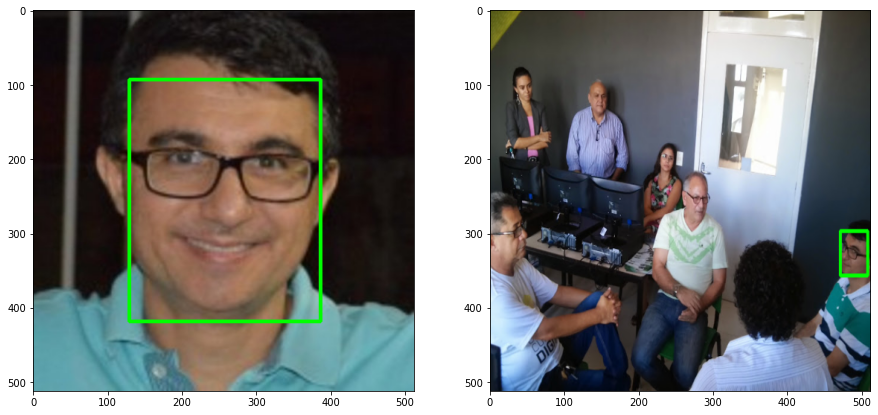

In [15]:
img_regis_b = cv2.rectangle(img_regis,(left,top),(left+width,top+height),(0,255,0),3)
img_c_regis_b = cv2.rectangle(img_c_regis,(left_,top_),(left_+width_,top_+height_),(0,255,0),3)

img_c_regis_b = cv2.resize(img_c_regis_b,(img_regis_b.shape[0],img_regis_b.shape[1]))
f, axarr = plt.subplots(1,2,figsize=(15,15));
axarr[0].imshow(img_regis_b);
axarr[1].imshow(img_c_regis_b);

### Detecção de Textos

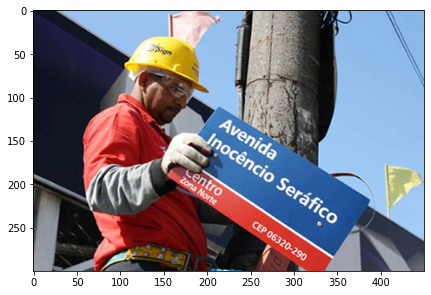

In [16]:
img_c_text = cv2.imread('imagens/placa.jpg')
img_c_text = cv2.cvtColor(img_c_text,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(7,7))            
plt.imshow(img_c_text);

In [ ]:
detect_text = client.detect_text(
    Image={
        'S3Object': {
            'Bucket': 'grupomachinelearning',
            'Name': 'imagens/placa.jpg',
        }
    })

In [18]:
detect_text['TextDetections']

[{'Confidence': 76.10690307617188,
  'DetectedText': 'Lsign',
  'Geometry': {'BoundingBox': {'Height': 0.03993576765060425,
    'Left': 0.29610908031463623,
    'Top': 0.11421462148427963,
    'Width': 0.06401736289262772},
   'Polygon': [{'X': 0.29610908031463623, 'Y': 0.11421462148427963},
    {'X': 0.36012646555900574, 'Y': 0.14673089981079102},
    {'X': 0.35111111402511597, 'Y': 0.18666666746139526},
    {'X': 0.28709375858306885, 'Y': 0.15415039658546448}]},
  'Id': 0,
  'Type': 'LINE'},
 {'Confidence': 99.1515884399414,
  'DetectedText': 'Avenida',
  'Geometry': {'BoundingBox': {'Height': 0.045109592378139496,
    'Left': 0.484256774187088,
    'Top': 0.3993102014064789,
    'Width': 0.14907655119895935},
   'Polygon': [{'X': 0.484256774187088, 'Y': 0.3993102014064789},
    {'X': 0.6333333253860474, 'Y': 0.5333333611488342},
    {'X': 0.6153091192245483, 'Y': 0.5784429311752319},
    {'X': 0.466232568025589, 'Y': 0.444419801235199}]},
  'Id': 1,
  'Type': 'LINE'},
 {'Confidence'

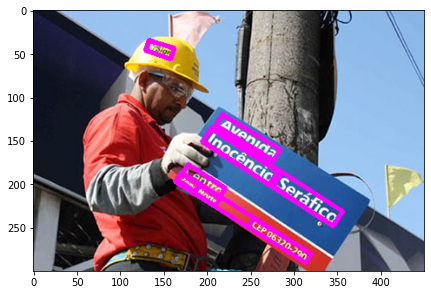

In [19]:
for i in range(len(detect_text['TextDetections'])):
 #   width_ = int(img_c_text.shape[1] * detect_text['TextDetections'][i]['Geometry']['BoundingBox']['Width'])
  #  height_ = int(img_c_text.shape[0] * detect_text['TextDetections'][i]['Geometry']['BoundingBox']['Height'])
   # top_ = int(img_c_text.shape[0] * detect_text['TextDetections'][i]['Geometry']['BoundingBox']['Top'])
  #  left_ = int(img_c_text.shape[1] * detect_text['TextDetections'][i]['Geometry']['BoundingBox']['Left'])
  #  img_c_text = cv2.rectangle(img_c_text,(left_,top_),(left_+width_,top_+height_),(0,255,0),3)
    points_polygon = []
    for j in range(len(detect_text['TextDetections'][0]['Geometry']['Polygon'])):
        x = img_c_text.shape[1] *detect_text['TextDetections'][i]['Geometry']['Polygon'][j]['X']
        y = img_c_text.shape[0] *detect_text['TextDetections'][i]['Geometry']['Polygon'][j]['Y']
        points_polygon.append([x,y])
        
    points_polygon = np.array(points_polygon,np.int32)
    points_polygon = points_polygon.reshape((-1,1,2))

    img_c_text = cv2.polylines(img_c_text,[points_polygon],True,(255,0,255),3)
    
plt.figure(figsize=(7,7))            
plt.imshow(img_c_text);

### Detecção de Objetos

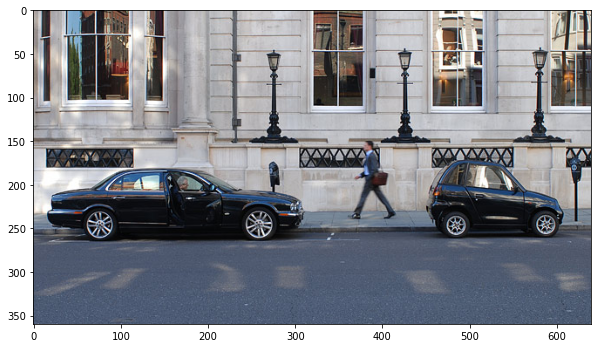

In [20]:
img_obj = cv2.imread('imagens/imagem_rua.jpg')
img_obj = cv2.cvtColor(img_obj,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))            
plt.imshow(img_obj);

In [ ]:
detect_obj = client.detect_labels(
    Image={
        'S3Object': {
            'Bucket': 'grupomachinelearning',
            'Name': 'imagens/imagem_rua.jpg',
        }
    })

In [22]:
detect_obj['Labels']

[{'Confidence': 99.73387908935547,
  'Instances': [],
  'Name': 'Transportation',
  'Parents': []},
 {'Confidence': 99.73387908935547,
  'Instances': [{'BoundingBox': {'Height': 0.25500571727752686,
     'Left': 0.7030714750289917,
     'Top': 0.4735572934150696,
     'Width': 0.24960112571716309},
    'Confidence': 99.73387908935547},
   {'BoundingBox': {'Height': 0.23918627202510834,
     'Left': 0.03245706483721733,
     'Top': 0.4930286705493927,
     'Width': 0.46414804458618164},
    'Confidence': 99.01761627197266}],
  'Name': 'Car',
  'Parents': [{'Name': 'Vehicle'}, {'Name': 'Transportation'}]},
 {'Confidence': 99.73387908935547,
  'Instances': [],
  'Name': 'Vehicle',
  'Parents': [{'Name': 'Transportation'}]},
 {'Confidence': 99.73387908935547,
  'Instances': [],
  'Name': 'Automobile',
  'Parents': [{'Name': 'Vehicle'}, {'Name': 'Transportation'}]},
 {'Confidence': 99.66912841796875,
  'Instances': [],
  'Name': 'Human',
  'Parents': []},
 {'Confidence': 99.66912841796875,


In [25]:
detect_obj['Labels'][1]

{'Confidence': 99.73387908935547,
 'Instances': [{'BoundingBox': {'Height': 0.25500571727752686,
    'Left': 0.7030714750289917,
    'Top': 0.4735572934150696,
    'Width': 0.24960112571716309},
   'Confidence': 99.73387908935547},
  {'BoundingBox': {'Height': 0.23918627202510834,
    'Left': 0.03245706483721733,
    'Top': 0.4930286705493927,
    'Width': 0.46414804458618164},
   'Confidence': 99.01761627197266}],
 'Name': 'Car',
 'Parents': [{'Name': 'Vehicle'}, {'Name': 'Transportation'}]}

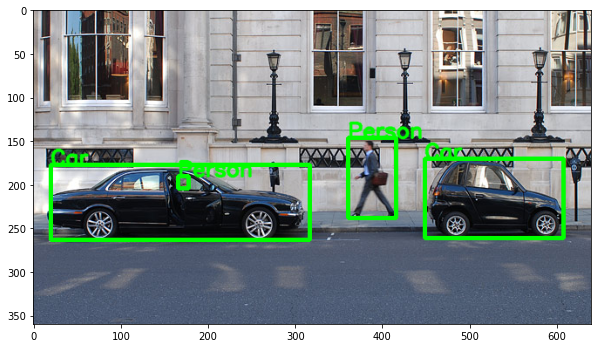

In [24]:
font = cv2.FONT_HERSHEY_SIMPLEX

for i in range(len(detect_obj['Labels'])):
    if(detect_obj['Labels'][i]['Instances'] != []):
        
        
        for j  in range(len(detect_obj['Labels'][i]['Instances'])):
            
            width = int(img_obj.shape[1] * detect_obj['Labels'][i]['Instances'][j]['BoundingBox']['Width'])
            height = int(img_obj.shape[0] *detect_obj['Labels'][i]['Instances'][j]['BoundingBox']['Height'])
            top = int(img_obj.shape[0] * detect_obj['Labels'][i]['Instances'][j]['BoundingBox']['Top'])
            left = int(img_obj.shape[1] * detect_obj['Labels'][i]['Instances'][j]['BoundingBox']['Left'])
            
            img_obj = cv2.rectangle(img_obj,(left,top),(left+width,top+height),(0,255,0),3)
            cv2.putText(img_obj, detect_obj['Labels'][i]['Name'] , (left, top), font, 0.8, (0, 255, 0), 2, cv2.LINE_AA)


plt.figure(figsize=(10,10))            
plt.imshow(img_obj);           